In [ ]:
from google.colab import drive
import zipfile
import os
#import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet

from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Flatten, Dropout, Input

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
#mount Gdrive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/MyDrive/fruits-360.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# menentukan direktori
base_dir = "/content"
train_dir = os.path.join(base_dir,'Training/')
test_dir = os.path.join(base_dir, 'Test/')

In [ ]:
total_kelas = len(os.listdir(train_dir))
print("Jumlah kelas adalah {}".format(total_kelas))

Jumlah kelas adalah 131


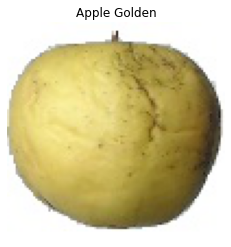

In [ ]:
img = load_img(train_dir + "Apple Golden 1/0_100.jpg")
plt.imshow(img)
plt.title("Apple Golden")
plt.axis("off")
plt.show()

In [ ]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(100, 100, 3)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())

In [ ]:
model.add(Flatten())
model.add(Dense(1024,activation='relu'))

In [ ]:
model.add(Dropout(0.5))
model.add(Dense(total_kelas,activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
batch_size = 32
number_of_batch = 1600 // batch_size

In [ ]:
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 45s 576ms/step - loss: 4.9711 - accuracy: 0.0108 - val_loss: 4.6453 - val_accuracy: 0.0375
Epoch 2/100
50/50 [==============================] - 28s 557ms/step - loss: 4.5742 - accuracy: 0.0279 - val_loss: 4.0011 - val_accuracy: 0.1050
Epoch 3/100
50/50 [==============================] - 28s 561ms/step - loss: 4.0767 - accuracy: 0.0735 - val_loss: 3.5317 - val_accuracy: 0.1462
Epoch 4/100
50/50 [==============================] - 28s 556ms/step - loss: 3.6904 - accuracy: 0.1077 - val_loss: 2.9484 - val_accuracy: 0.2325
Epoch 5/100
50/50 [==============================] - 28s 557ms/step - loss: 3.2741 - accuracy: 0.1695 - val_loss: 2.8450 - val_accuracy: 0.2475
Epoch 6/100
50/50 [==============================] - 28s 559ms/step - loss: 2.9609 - accuracy: 0.2143 - val_loss: 2.0741 - val_accuracy: 0.4487
Epoch 7/100
50/50 [==============================] - 28s 557ms/step - loss: 2.6006 - accuracy: 0.2893 - val_loss: 1.8767 - val_accuracy:

In [ ]:
saved_model_dir = '/content/TFLite'
tf.saved_model.save(model, saved_model_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/TFLite/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

In [ ]:
with open('labels.txt', 'w') as f:
  f.write(labels)

In [ ]:
!zip -r /content/file.zip /content/TFLite

  adding: content/TFLite/ (stored 0%)
  adding: content/TFLite/assets/ (stored 0%)
  adding: content/TFLite/saved_model.pb (deflated 89%)
  adding: content/TFLite/variables/ (stored 0%)
  adding: content/TFLite/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: content/TFLite/variables/variables.index (deflated 66%)


In [ ]:
from google.colab import files
files.download("/content/model.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/labels.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/file.zip")

NameError: ignored

In [ ]:
files.download("/content/model.h5")

In [ ]:
files.download("/content/readme.md")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


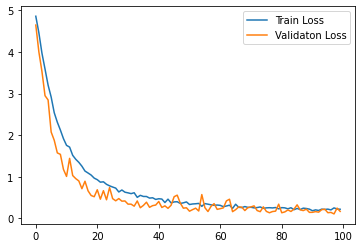

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

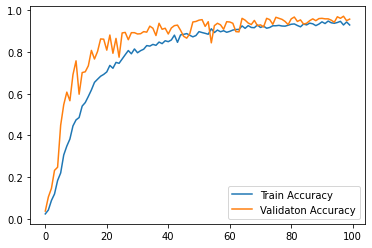

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save_weights("model.h5")